# Generación señales PWM

El objetivo de este ejercicio es desarrollar una función que genere las muestras de una señal PWM.

Una señal PWM (Pulse Width Modulation), es un tipo de señal que permite *codificar* una serie de valores en las anchuras de una serie de pulsos rectangulares.

Para entender como son estas señales, considere que:

* los valores posibles a codificar son [1,2,3]. 

* la duración de los pulsos es 5.

En ese caso:

* Para codificar la secuencia 2,1,1,3,1,...
  
  * Para codificar el primer "2" , generaríamos las muestras [1,1,0,0,0] (Observe que el número total de muestras es constante e igual a 5.
  
  * Para codificar los "1"s, generaríamos para cada uno de ellos las muestras : [1,0,0,0,0], es decir de nuevo 5 muestras una de las cuales vale 1.

  * Para codificar el 3 : [1,1,1,0,0]
  
* Por tanto la secuencia 2,1,1,3,1 se codificaría como : 1,1,0,0,0,  1,0,0,0,0,  1,0,0,0,0,  1,1,1,0,0,  1,0,0,0,0

In [1]:
#Importaremos los módulos necesarios
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
matplotlib.rcParams['figure.figsize'] = (10.0, 5)

## Programación

Cree una función PWM_cod que reciba como argumentos:

* Un vector de enteros de símbolos a codificar

* Un entero que corresponda con la duración en muestras de los símbolos (el 5 del ejemplo)

y devuelva un vector de ceros y unos con la señal PWM

In [11]:
def PWM_cod(simbolos, duracion):
    '''
    Genera muestras de una señal PWM a partir de unos simbolos
    Los simbolos son enteros entre 1 y Nmax
    La duración de cada simbolo es "duracion" muestras
    Puede suponer que duracion Nmax < duracion
    [1,1,0,0,0,  1,0,0,0,0,  1,0,0,0,0,  1,1,1,0,0,  1,0,0,0,0] = PWM_cod([2,1,1,3,1],5);

    La salida DEBE SER UN ARRAY DE NUMPY
    '''

    if isinstance(simbolos,list):
        simbolos=np.array(simbolos)
    
    assert np.all(simbolos>0), "Los simbolos deben ser entereos >=1"
    assert np.all(simbolos<duracion), "Lo símbolos deben ser entereos menores que duracion"
    out=[]
    ### BEGIN SOLUTION
    for n in simbolos:
        ceros=[0]*duracion
        ceros[:n]=[1]*n
        out += ceros
    ### END SOLUTION

    return np.array(out)


## Prueba de la función desarrollada

Generaremos unos simbolos aleatorios usando la función randint

In [3]:
# Comprobación por el estudiante de que su función es correcta
simbolos =np.array([3,2,1,1,4])
duracion = 6
print('simbolos=', simbolos)
pwm=PWM_cod(simbolos,duracion)
print("pwm=",pwm)
## Mire la salida en pwm y compruebe que se corresponde

simbolos= [3 2 1 1 4]
pwm= [1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0]


La salida debería ser:

 * simbolos= \[3 2 1 1 4\]

 * pwm= \[1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0\]

In [4]:
# Comprobación por el estudiante de que devuelve un array de numpy del tamaño adecuado.
# Si no da errores es que está bien


if not isinstance(pwm,np.ndarray):
    print("'pwm' No es un array de numpy, es del tipo ",type(pwm))
assert len(pwm)==len(simbolos)*duracion, "'pwm' no tiene el tamaño correcto"
    



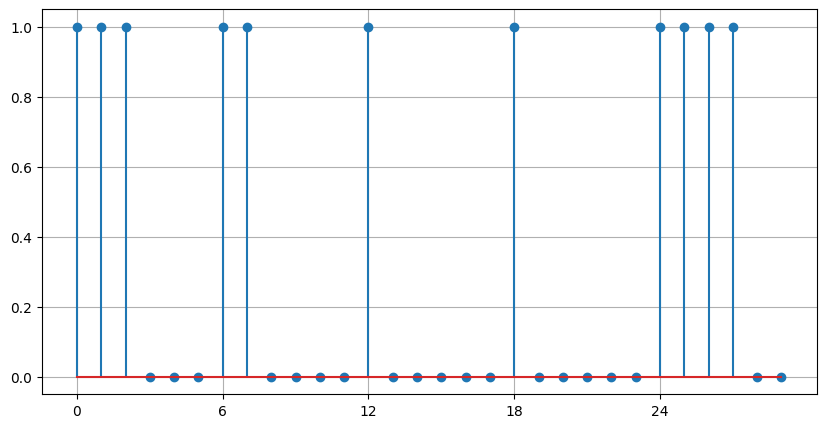

In [5]:
#Gráfica para verificación por el estudiante

# Gráficamente es sencillo de ver. Deben observarse tantos pulsos como simbolos, y la cantidad de 
# unos en cada uno debe ser el valor de los simbilos
_=plt.stem(pwm)
_=plt.xticks(np.arange(0,30,6))
_=plt.grid()


A la vista de la gráfica.

* Compruebe que la función hace lo esperado.

* Si no es así corríjala hasta que lo logre.



In [6]:
# Celda para corrección automática

### BEGIN HIDDEN TESTS
# AUTOTEST PWM_cod(np.array([1,6,3,4,4,2,1,7]),10)
### END HIDDEN TESTS

## Modificación de la función

Copie la función anterior y extiendala con dos argumentos más

* prefijo: cantidad de muestras nulas que preceden al primer símbolo.
* sufijo: cantidad de muestras nulas que siguen al último símbolo.

In [7]:
def PWM_cod2(simbolos, duracion,prefijo,sufijo):
    '''
    Genera muestras de una señal PWM a partir de unos simbolos
    Los simbolos son enteros entre 1 y Nmax
    La duración de cada simbolo es "duracion" muestras
    Puede suponer que duracion Nmax < duracion
    
    prefijo: cantidad de muestras nulas que preceden al primer símbolo
    sufijo: cantidad de muestras nulas que siguen al último simbolos
    prefijo=3
    sufijo=2
    duracion=5
    [0,0,0, 1,1,0,0,0,  1,0,0,0,0,  1,0,0,0,0,  1,1,1,0,0,  1,0,0,0,0, 0,0] = PWM_cod([2,1,1,3,1], duracion , prefijo, sufijo);
    
    '''
    assert prefijo >=0 , "El prefijo debe ser un entero >=0"
    assert sufijo >=0 , "El prefijo debe ser un entero >=0"
    
    pwm_sin_prefijo_sufijo = PWM_cod(simbolos,duracion) # Se recomienda usar la función anterior
    
    pwm_con_prefijo_sufijo = None
### BEGIN SOLUTION
    p=np.zeros(prefijo)
    s=np.zeros(sufijo)
    pwm_con_prefijo_sufijo = np.concatenate((p,pwm_sin_prefijo_sufijo, s))
### END SOLUTION
    
    return pwm_con_prefijo_sufijo
    
    
    

## Comprobación

Ejecute los siguientes bloques y verifique que funciona correctamente.



simbolos= [2 3 1]
pwm2: [0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


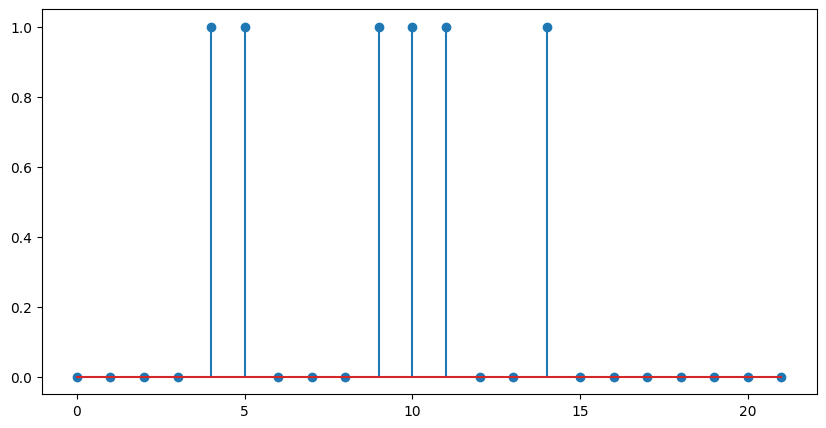

In [8]:
# Celda para comprobar visualmente si el resultado es correcto
simbolos =np.array([2,3,1])
duracion = 5
prefijo = 4
sufijo = 3
print('simbolos=', simbolos)
pwm2=PWM_cod2(simbolos,duracion,prefijo,sufijo)
print('pwm2:',pwm2)
_=plt.stem(pwm2)

Compruebe que el resultado de la celda anterior debe ser:
* simbolos= \[2 3 1\]

* prefijo = 4

* sufijo = 2

* duracion = 5

* pwm2: \[0. 0. 0. 0. &emsp;  1. 1. 0. 0. 0. &emsp; 1. 1. 1. 0. 0. &emsp; 1. 0. 0. 0. 0. &emsp; 0. 0. 0.\]

In [9]:
# Celda para evaluación automática

### BEGIN HIDDEN TESTS
simbolos =np.array([2,3,1,6,7,3,2,2,8,4])
duracion = 13
prefijo = 9
sufijo = 5
### HASHED AUTOTEST PWM_cod2(simbolos,duracion,prefijo,sufijo)
### END HIDDEN TESTS

## Generación y almacenamiento de una señal

En otro ejercicio, va a implementar un decodificador PWM, es decir una función que reciba las muestras PWM y devuelva los símbolos.

Para poder probar el decodificador, guardaremos un ejemplo en este ejercicio


[ 1 11  5 11 18  8 12 17 15 10 15  6 13 18  3  1  8  3 15  7  6 12 19 11
  6]


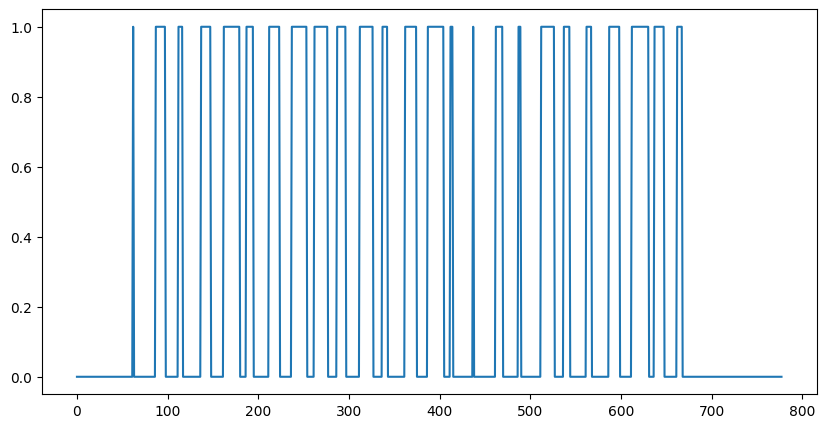

In [10]:
simbolos =1+np.random.randint(20,size=25)
print(simbolos)
np.save('simbolos.npy',simbolos)

prefijo = 62
sufijo = 91
duracion = 25
pwm3=PWM_cod2(simbolos,duracion,prefijo,sufijo)
_=plt.plot(pwm3)
np.save('pwm.npy',pwm3)